In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from helper import fig_path

sns.set_theme(context="paper", style="darkgrid", rc={"axes.facecolor": "0.96"})
fontsize = "x-large"
params = {
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern"],
    "axes.labelsize": fontsize,
    "axes.titlesize": fontsize,
    "legend.fontsize": fontsize,
    "xtick.labelsize": fontsize,
    "ytick.labelsize": fontsize,
    "figure.titlesize": fontsize,
    "legend.handlelength": 2,
}
plt.rcParams.update(params)
plt.rc("text", usetex=True)

In [7]:
df_i = pd.read_csv(f"./vae_data/beta_0.1_conv_vae_bmnist.csv")
df_i["bce"].iloc[-1]

34.742016

In [8]:
betas = [0.1, 0.5, 1, 2, 5, 10]
bces = []
klds = []

for beta in betas:
    df_i = pd.read_csv(f"./vae_data/beta_{beta}_conv_vae_bmnist.csv")
    bces.append(df_i["bce"].iloc[-1])
    klds.append(df_i["kld"].iloc[-1])

print(bces)
print(klds)

[34.742016, 35.552185, 40.62459, 52.348484, 79.99, 114.06944]
[65.77866, 42.032955, 30.563766, 19.670935, 9.546471, 4.5335026]


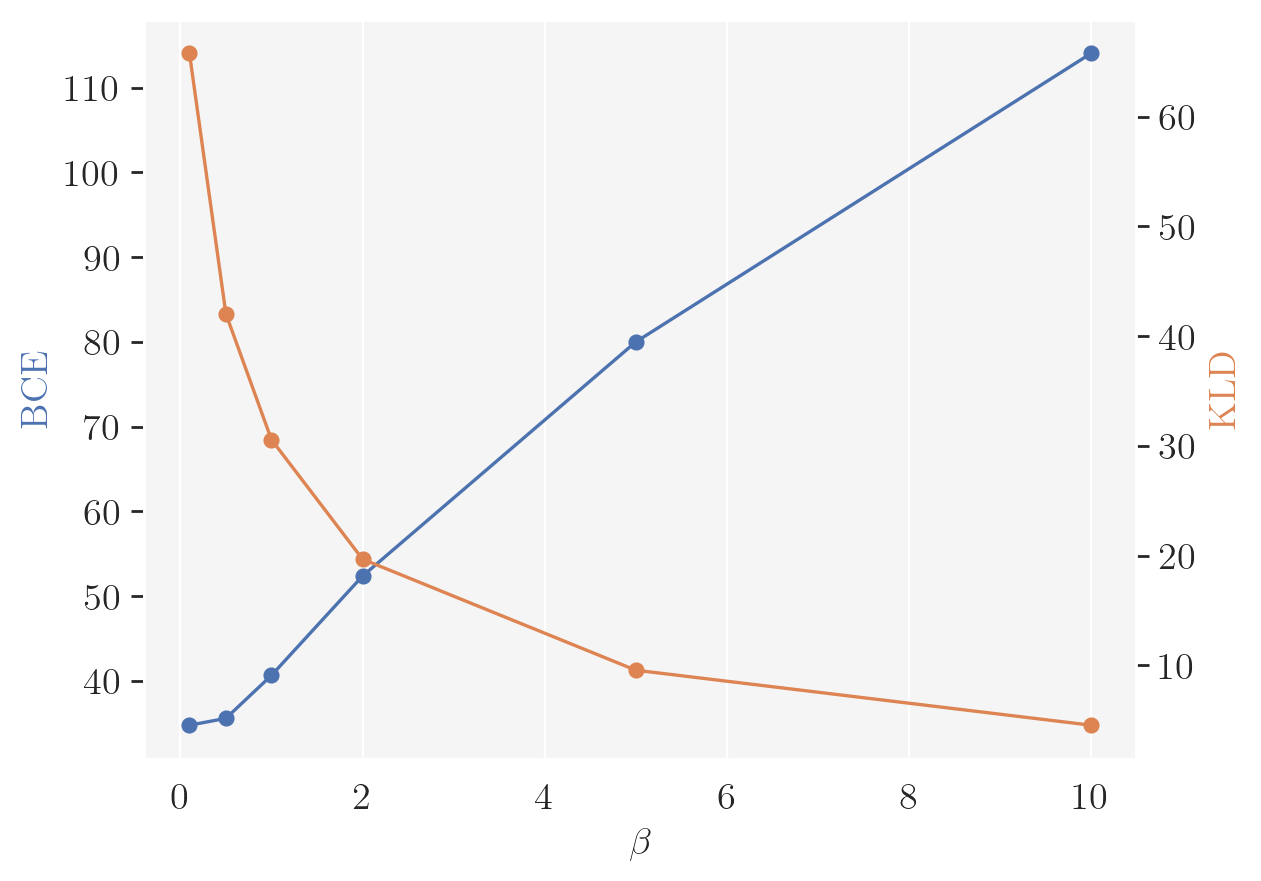

In [18]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(betas, bces, "C0o-")
ax2.plot(betas, klds, "C1o-")

ax1.set_xlabel(r"$\beta$")
ax1.set_ylabel("BCE", color="C0")
ax2.set_ylabel("KLD", color="C1")

ax1.yaxis.grid(False)
ax2.yaxis.grid(False)

fig.savefig(fig_path("bce_kld_vs_beta.pdf"), bbox_inches="tight")